

# Comparación de Modelos: Regresión Logística vs Árbol de Decisión

En esta clase realizaremos una comparación entre dos modelos de clasificación binaria:  
**Regresión Logística (Logit)** y **Árbol de Decisión**, usando el dataset de bibliotecas públicas.

In [8]:
# ===========================================
# PASO 1: Importación de bibliotecas básicas
# ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ===========================================
# PASO 2: Carga y preparación de datos (versión corregida)
# ===========================================
# Cargar dataset
data = pd.read_csv('bibliotecas_publicas.csv')

# Crear copia explícita del DataFrame para evitar el warning
X = data[['Tamaño_m2', 'Num_empleados', 'Coleccion_libros', 
          'Computadoras', 'Eventos_mes', 'Zona_infantil']].copy()

# Corrección del warning: usar .loc para modificación
X.loc[:, 'Zona_infantil'] = X['Zona_infantil'].astype(int)
y = data['Afluencia_alta']

# ===========================================
# PASO 3: División train-test
# ===========================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ===========================================
# PASO 4: Modelo de Regresión Logística
# ===========================================
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# ===========================================
# PASO 5: Modelo de Árbol de Decisión
# ===========================================
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# ===========================================
# PASO 6: Evaluación básica
# ===========================================
from sklearn.metrics import accuracy_score

# Precisión Regresión Logística
y_pred_log = log_reg.predict(X_test)
print(f"Precisión Regresión Logística: {accuracy_score(y_test, y_pred_log):.2f}")

# Precisión Árbol de Decisión
y_pred_tree = tree_clf.predict(X_test)
print(f"Precisión Árbol de Decisión: {accuracy_score(y_test, y_pred_tree):.2f}")

Precisión Regresión Logística: 0.43
Precisión Árbol de Decisión: 0.60


## Paso 2: Cargar y Explorar los Datos

In [9]:
# ===========================================
# PASO 2: Carga y exploración de datos
# ===========================================

# Cargar el dataset de bibliotecas públicas desde el archivo CSV
data = pd.read_csv('bibliotecas_publicas.csv')

# Seleccionar las variables predictoras (features) y convertir a DataFrame
X = data[['Tamaño_m2', 'Num_empleados', 'Coleccion_libros', 
          'Computadoras', 'Eventos_mes', 'Zona_infantil']]

# Extraer la variable objetivo (0 = baja afluencia, 1 = alta afluencia)
y = data['Afluencia_alta']

# Mostrar estadísticas descriptivas de las variables numéricas
print("\n📊 Estadísticas descriptivas de las variables predictoras:")
print(X.describe())

# Mostrar distribución de la variable objetivo
print("\n🔍 Distribución de la afluencia en bibliotecas:")
print(y.value_counts())
print(f"\nProporción: {y.mean():.2%} alta afluencia")

# Mostrar primeras filas del DataFrame
print("\n📋 Primeras filas del dataset:")
display(data.head(3))


📊 Estadísticas descriptivas de las variables predictoras:
        Tamaño_m2  Num_empleados  Coleccion_libros  Computadoras  Eventos_mes  \
count  100.000000     100.000000        100.000000    100.000000   100.000000   
mean   286.190000       7.720000       9575.100000     14.910000     6.750000   
std    122.833277       3.977411       5566.884863      8.764131     4.457147   
min     51.000000       1.000000        912.000000      0.000000     0.000000   
25%    179.750000       5.000000       4929.000000      7.000000     3.000000   
50%    275.000000       7.000000       9061.000000     13.500000     7.000000   
75%    395.000000      12.000000      14168.750000     24.000000    11.000000   
max    492.000000      14.000000      19723.000000     29.000000    14.000000   

       Zona_infantil  
count     100.000000  
mean        0.660000  
std         0.476095  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  

🔍 D

,ID,Nombre,Ubicacion,Tamaño_m2,Horario_apertura,Num_empleados,Coleccion_libros,Computadoras,Eventos_mes,Zona_infantil,Acceso_transporte,Afluencia_alta
0,1,Biblioteca Regional 1,Valladolid,103,Tarde (16-21h),12,9935,12,10,1,1,0
1,2,Biblioteca Este 2,Barcelona,392,Mañana (9-14h),10,11810,20,11,1,1,0
2,3,Biblioteca Del Barrio 3,Madrid,273,Completo (9-21h),7,13796,9,4,1,1,1


# 📚 Dataset de Bibliotecas Públicas Españolas

Este dataset contiene información detallada sobre 100 bibliotecas públicas en diversas ciudades españolas.

---

## 🏛 Información general

- **Número de registros**: 100 bibliotecas
- **Número de variables**: 11 características
- **Ciudades representadas**: 12 (Madrid, Barcelona, Valencia, Murcia, etc.)
- **Variables categóricas**: 4 
- **Variables numéricas**: 7 

---

## 🎯 Variables Principales

### 📍 Características básicas
| Variable          | Descripción                          | Tipo       |
|-------------------|--------------------------------------|------------|
| Nombre            | Nombre identificativo                | Categórica |
| Ubicacion         | Ciudad                               | Categórica |
| Tamaño_m2         | Superficie (m²)                      | Numérica   |
| Horario_apertura  | Franja horaria                       | Categórica |

### 📊 Métricas de servicios
| Variable           | Descripción                          | Tipo       |
|--------------------|--------------------------------------|------------|
| Num_empleados      | Personal trabajando                  | Numérica   |
| Coleccion_libros   | Total de libros                      | Numérica   |
| Computadoras       | Equipos informáticos                 | Numérica   |
| Zona_infantil      | Area infantil (1=Sí/0=No)            | Binaria    |

### 🌐 Impacto comunitario
| Variable           | Descripción                          | Tipo       |
|--------------------|--------------------------------------|------------|
| Eventos_mes        | Actividades mensuales                | Numérica   |
| Acceso_transporte  | Conexión transporte (1=Sí/0=No)      | Binaria    |
| Afluencia_alta     | Alta afluencia (1=Sí/0=No)           | Binaria    |

---

## 📋 Detalles importantes

### 🕒 Horarios
- **Mañana (9-14h)**: 38 bibliotecas
- **Tarde (16-21h)**: 39 bibliotecas
- **Completo (9-21h)**: 23 bibliotecas

### 📍 Top 5 ciudades
1. Murcia (12 bibliotecas)
2. Madrid (11)
3. Valladolid (10)
4. Valencia (9)
5. Zaragoza (7)

### 📚 Colecciones
- **Máximo**: 19,725 libros
- **Mínimo**: 917 libros
- **Promedio**: ~9,893 libros

---

## 💡 Ideas para análisis

1. **Relaciones**:
   - Tamaño vs Número de empleados
   - Computadoras vs Afluencia

2. **Patrones horarios**:
   - Eventos mensuales por horario
   - Afluencia en diferentes franjas

3. **Servicios infantiles**:
   - Comparativa entre bibliotecas con/sin zona infantil

# 📊 Comparación de Modelos: Regresión Logística vs Árbol de Decisión

## 🔍 Contexto del Análisis
Utilizamos un dataset de 100 bibliotecas públicas españolas para predecir si una biblioteca tendrá **alta afluencia de usuarios** (variable binaria `Afluencia_alta` donde 1 = Alta afluencia, 0 = Baja afluencia). Las variables predictoras seleccionadas representan características estructurales y operativas:

```python
predictoras = ['Tamaño_m2', 'Num_empleados', 'Coleccion_libros', 
              'Computadoras', 'Eventos_mes', 'Zona_infantil', 
              'Acceso_transporte']

from sklearn.model_selection import train_test_split

# Separación de variables
X = datos[predictoras]  # Matriz de características
y = datos['Afluencia_alta']  # Vector objetivo

# División estratificada 70-30
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% para prueba
    random_state=42,      # Semilla fija
    stratify=y            # Mantiene proporción de clases
)

# Verificación
print(f"Distribución original: {y.mean():.2%} alta afluencia")
print(f"Train set: {y_train.mean():.2%} alta afluencia") 
print(f"Test set: {y_test.mean():.2%} alta afluencia")

In [14]:
# PASO 1: Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split

# PASO 2: Cargar los datos con la ruta completa
datos = pd.read_csv(r'C:\Users\Lenovo\Desktop\uninpahu\Regresion logistica vs arbol\bibliotecas_publicas.csv')

# PASO 3: Seleccionar variables
# Variables predictoras (features)
features = ['Tamaño_m2', 'Num_empleados', 'Coleccion_libros', 
            'Computadoras', 'Eventos_mes', 'Zona_infantil', 
            'Acceso_transporte']

# Variable objetivo (target)
target = 'Afluencia_alta'

X = datos[features]  # Datos de entrada
y = datos[target]    # Variable a predecir

# PASO 4: Dividir los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% para prueba
    random_state=42,    # Semilla para reproducibilidad
    stratify=y         # Mantiene proporción de clases
)

# PASO 5: Verificación (opcional pero recomendado)
print("✅ Distribución de clases:")
print(f"Original: {sum(y)/len(y):.2%} alta afluencia")
print(f"Entrenamiento: {sum(y_train)/len(y_train):.2%} ({len(y_train)} bibliotecas)")
print(f"Prueba: {sum(y_test)/len(y_test):.2%} ({len(y_test)} bibliotecas)")

print("\n📊 Muestra del conjunto de entrenamiento:")
X_train.head()

✅ Distribución de clases:
Original: 63.00% alta afluencia
Entrenamiento: 62.86% (70 bibliotecas)
Prueba: 63.33% (30 bibliotecas)

📊 Muestra del conjunto de entrenamiento:


,Tamaño_m2,Num_empleados,Coleccion_libros,Computadoras,Eventos_mes,Zona_infantil,Acceso_transporte
31,146,6,5887,25,7,1,1
70,51,7,3940,19,1,0,1
72,353,12,11018,7,12,0,0
62,148,12,16548,29,2,1,1
59,200,1,3467,25,12,0,1


## Paso 4: Entrenar los Modelos

In [15]:
# 🔹 Modelo de Regresión Logística (Logit)
log_model = LogisticRegression(max_iter=10000)  
# Creamos el modelo logístico. Se establece max_iter=10000 para asegurar que el algoritmo converge,
# especialmente cuando hay muchas variables o los datos requieren más iteraciones.

log_model.fit(X_train, y_train) # Entrenamos el modelo usando los datos de entrenamiento. Aquí el modelo "aprende" la relación entre las variables X e y.
y_pred_log = log_model.predict(X_test)  # Generamos predicciones de clase (0 o 1) sobre el conjunto de prueba. Esto es lo que el modelo cree que es la clase verdadera.

y_proba_log = log_model.predict_proba(X_test)[:, 1]  # Obtenemos las probabilidades predichas de que la clase sea "1" (benigno). 
# Esto se usa para calcular curvas ROC, métricas de umbral, etc.

# 🔸 Modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)  # Creamos el árbol de decisión. Usamos random_state para que los resultados sean reproducibles.
tree_model.fit(X_train, y_train)  # Entrenamos el árbol con los datos de entrenamiento. El árbol genera reglas basadas en divisiones de los datos.

y_pred_tree = tree_model.predict(X_test)  
# Realizamos predicciones de clase (0 o 1) sobre los datos de prueba usando el árbol entrenado.

y_proba_tree = tree_model.predict_proba(X_test)[:, 1]  
# Extraemos la probabilidad predicha de que la clase sea "1". 
# Igual que en el logit, esto sirve para métricas como AUC o análisis de umbrales de decisión.

## Paso 5: Curvas ROC y AUC

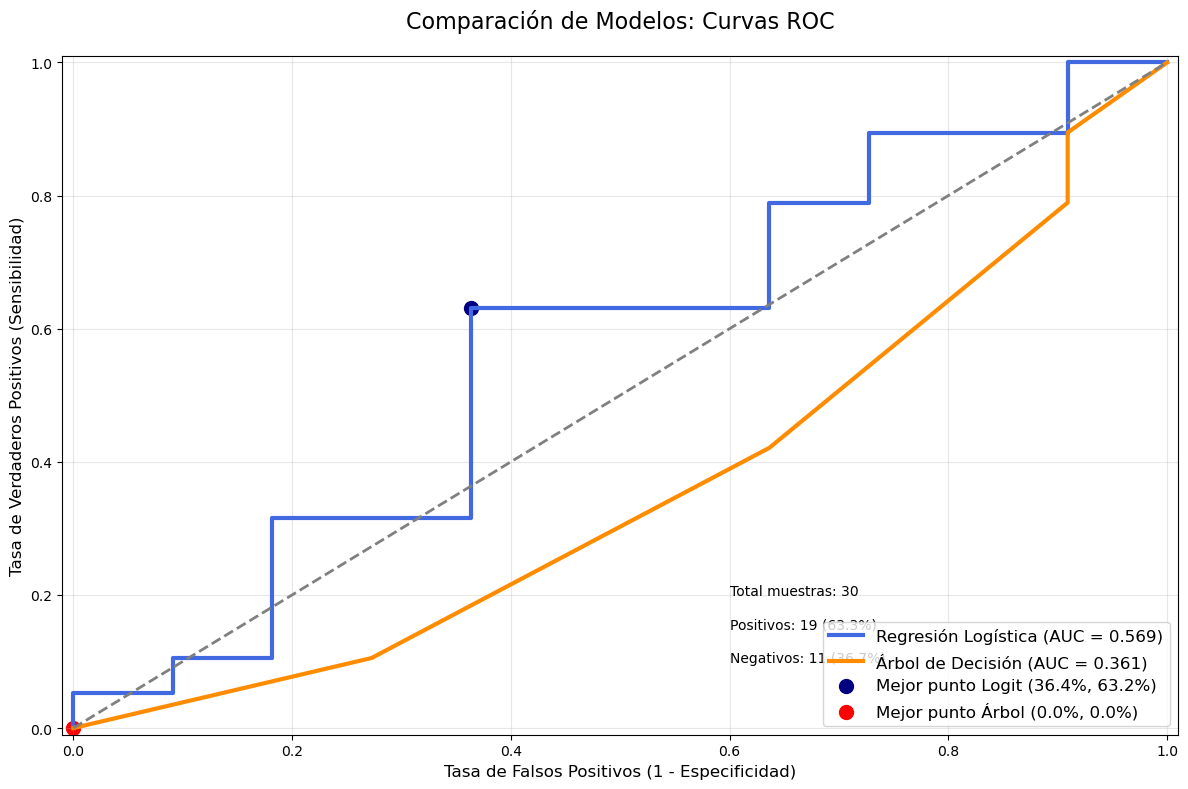

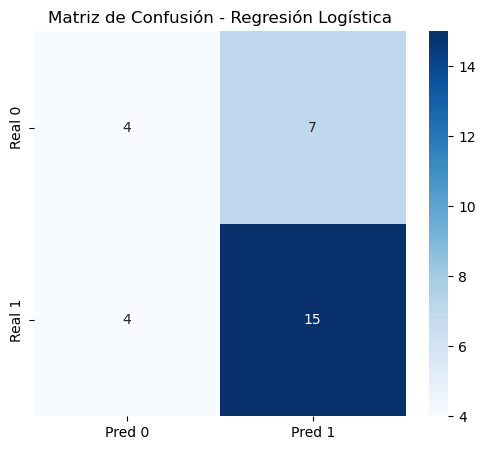

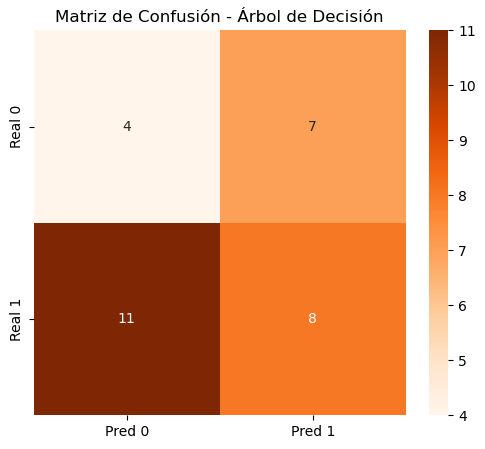


Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.68      0.79      0.73        19

    accuracy                           0.63        30
   macro avg       0.59      0.58      0.58        30
weighted avg       0.62      0.63      0.62        30


Reporte de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.27      0.36      0.31        11
           1       0.53      0.42      0.47        19

    accuracy                           0.40        30
   macro avg       0.40      0.39      0.39        30
weighted avg       0.44      0.40      0.41        30



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import seaborn as sns

# 1. Cargar los datos
datos = pd.read_csv(r'C:\Users\Lenovo\Desktop\uninpahu\Regresion logistica vs arbol\bibliotecas_publicas.csv')

# 2. Seleccionar variables
features = ['Tamaño_m2', 'Num_empleados', 'Coleccion_libros', 
            'Computadoras', 'Eventos_mes', 'Zona_infantil', 
            'Acceso_transporte']
target = 'Afluencia_alta'

X = datos[features]
y = datos[target]

# 3. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Entrenar modelos
# Regresión Logística
logit = LogisticRegression(max_iter=1000, random_state=42)
logit.fit(X_train, y_train)
y_proba_log = logit.predict_proba(X_test)[:, 1]

# Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

# 5. Calcular métricas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# 6. Crear gráfica ROC mejorada
plt.figure(figsize=(12, 8))

# Curvas ROC
plt.plot(fpr_log, tpr_log, color='royalblue', lw=3, 
         label=f'Regresión Logística (AUC = {roc_auc_log:.3f})')
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=3, 
         label=f'Árbol de Decisión (AUC = {roc_auc_tree:.3f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Mejor punto de corte (Youden's J statistic)
youden_log = tpr_log - fpr_log
ix_log = np.argmax(youden_log)
plt.scatter(fpr_log[ix_log], tpr_log[ix_log], marker='o', color='navy', s=100, 
            label=f'Mejor punto Logit ({(fpr_log[ix_log]*100):.1f}%, {(tpr_log[ix_log]*100):.1f}%)')

youden_tree = tpr_tree - fpr_tree
ix_tree = np.argmax(youden_tree)
plt.scatter(fpr_tree[ix_tree], tpr_tree[ix_tree], marker='o', color='red', s=100,
            label=f'Mejor punto Árbol ({(fpr_tree[ix_tree]*100):.1f}%, {(tpr_tree[ix_tree]*100):.1f}%)')

# Personalización
plt.title('Comparación de Modelos: Curvas ROC', fontsize=16, pad=20)
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# Añadir información adicional
plt.text(0.6, 0.2, f'Total muestras: {len(y_test)}', fontsize=10)
plt.text(0.6, 0.15, f'Positivos: {sum(y_test)} ({sum(y_test)/len(y_test):.1%})', fontsize=10)
plt.text(0.6, 0.1, f'Negativos: {len(y_test)-sum(y_test)} ({(len(y_test)-sum(y_test))/len(y_test):.1%})', fontsize=10)

# Mostrar gráfica
plt.tight_layout()
plt.show()

# 7. Gráficas adicionales para mayor información
# Matriz de confusión para Regresión Logística
y_pred_log = logit.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Matriz de confusión para Árbol de Decisión
y_pred_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Reportes de clasificación
print("\nReporte de Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_log))

print("\nReporte de Clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))

## Paso 6: Matriz de Confusión y Métricas

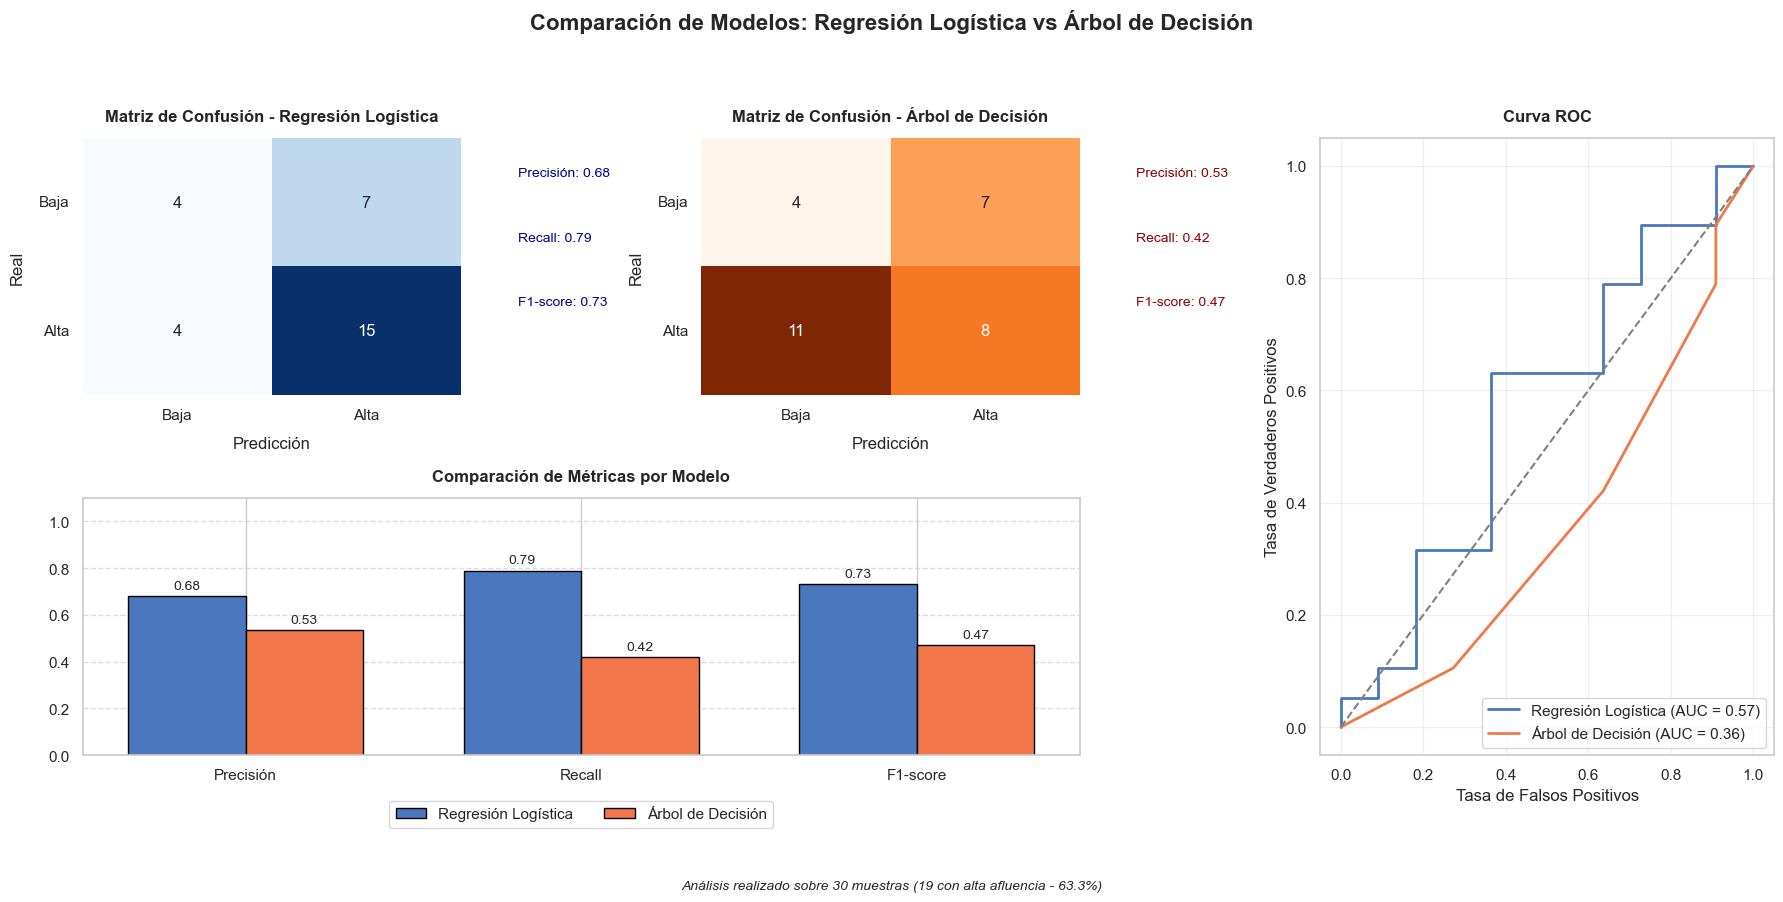

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
palette = {"Logit": "#4B77BE", "Árbol": "#F2784B"}

# 1. Cargar y preparar datos
datos = pd.read_csv(r'C:\Users\Lenovo\Desktop\uninpahu\Regresion logistica vs arbol\bibliotecas_publicas.csv')
features = ['Tamaño_m2', 'Num_empleados', 'Coleccion_libros', 'Computadoras', 'Eventos_mes', 'Zona_infantil', 'Acceso_transporte']
target = 'Afluencia_alta'

X = datos[features]
y = datos[target]

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Entrenar modelos
# Regresión Logística
logit = LogisticRegression(max_iter=1000, random_state=42)
logit.fit(X_train, y_train)
y_pred_log = logit.predict(X_test)
y_proba_log = logit.predict_proba(X_test)[:, 1]

# Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

# 4. Calcular métricas
conf_log = confusion_matrix(y_test, y_pred_log)
conf_tree = confusion_matrix(y_test, y_pred_tree)

report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

# 5. Visualización mejorada
fig = plt.figure(figsize=(18, 8))
fig.suptitle('Comparación de Modelos: Regresión Logística vs Árbol de Decisión', 
             fontsize=16, y=1.05, weight='bold')

# GridSpec para organización
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1.2], height_ratios=[1, 1])

# Matriz de Confusión - Logit
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_log, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize":12}, ax=ax1)
ax1.set_title("Matriz de Confusión - Regresión Logística", pad=12, weight='bold')
ax1.set_xlabel("Predicción", labelpad=10)
ax1.set_ylabel("Real", labelpad=10)
ax1.set_xticklabels(['Baja', 'Alta'], rotation=0)
ax1.set_yticklabels(['Baja', 'Alta'], rotation=0)

# Añadir métricas dentro de la matriz
ax1.text(2.3, 0.3, f"Precisión: {report_log['1']['precision']:.2f}", 
         fontsize=10, color='darkblue')
ax1.text(2.3, 0.8, f"Recall: {report_log['1']['recall']:.2f}", 
         fontsize=10, color='darkblue')
ax1.text(2.3, 1.3, f"F1-score: {report_log['1']['f1-score']:.2f}", 
         fontsize=10, color='darkblue')

# Matriz de Confusión - Árbol
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(conf_tree, annot=True, fmt="d", cmap="Oranges", cbar=False,
            annot_kws={"fontsize":12}, ax=ax2)
ax2.set_title("Matriz de Confusión - Árbol de Decisión", pad=12, weight='bold')
ax2.set_xlabel("Predicción", labelpad=10)
ax2.set_ylabel("Real", labelpad=10)
ax2.set_xticklabels(['Baja', 'Alta'], rotation=0)
ax2.set_yticklabels(['Baja', 'Alta'], rotation=0)

# Añadir métricas dentro de la matriz
ax2.text(2.3, 0.3, f"Precisión: {report_tree['1']['precision']:.2f}", 
         fontsize=10, color='darkred')
ax2.text(2.3, 0.8, f"Recall: {report_tree['1']['recall']:.2f}", 
         fontsize=10, color='darkred')
ax2.text(2.3, 1.3, f"F1-score: {report_tree['1']['f1-score']:.2f}", 
         fontsize=10, color='darkred')

# Gráfico de métricas comparativas
ax3 = fig.add_subplot(gs[1, 0:2])
metrics = ['Precisión', 'Recall', 'F1-score']
logit_scores = [report_log['1']['precision'], report_log['1']['recall'], report_log['1']['f1-score']]
tree_scores = [report_tree['1']['precision'], report_tree['1']['recall'], report_tree['1']['f1-score']]

x = np.arange(len(metrics))
width = 0.35

rects1 = ax3.bar(x - width/2, logit_scores, width, label='Regresión Logística', 
                 color=palette["Logit"], edgecolor='black')
rects2 = ax3.bar(x + width/2, tree_scores, width, label='Árbol de Decisión', 
                 color=palette["Árbol"], edgecolor='black')

ax3.set_title('Comparación de Métricas por Modelo', pad=12, weight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics)
ax3.set_ylim(0, 1.1)
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir valores en las barras
for rect in rects1 + rects2:
    height = rect.get_height()
    ax3.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Curva ROC
ax4 = fig.add_subplot(gs[:, 2])
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

ax4.plot(fpr_log, tpr_log, color=palette["Logit"], lw=2,
         label=f'Regresión Logística (AUC = {roc_auc_log:.2f})')
ax4.plot(fpr_tree, tpr_tree, color=palette["Árbol"], lw=2,
         label=f'Árbol de Decisión (AUC = {roc_auc_tree:.2f})')
ax4.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax4.set_title('Curva ROC', pad=12, weight='bold')
ax4.set_xlabel('Tasa de Falsos Positivos')
ax4.set_ylabel('Tasa de Verdaderos Positivos')
ax4.legend(loc="lower right")
ax4.grid(True, alpha=0.3)

# Añadir información general
plt.figtext(0.5, -0.05, 
            f"Análisis realizado sobre {len(y_test)} muestras ({sum(y_test)} con alta afluencia - {sum(y_test)/len(y_test):.1%})", 
            ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()

## Paso 7: Comparación de Métricas en Tabla

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16520\2244985377.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_comp, x='Diferencia', y='Métrica', palette='coolwarm', ax=ax2)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16520\2244985377.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


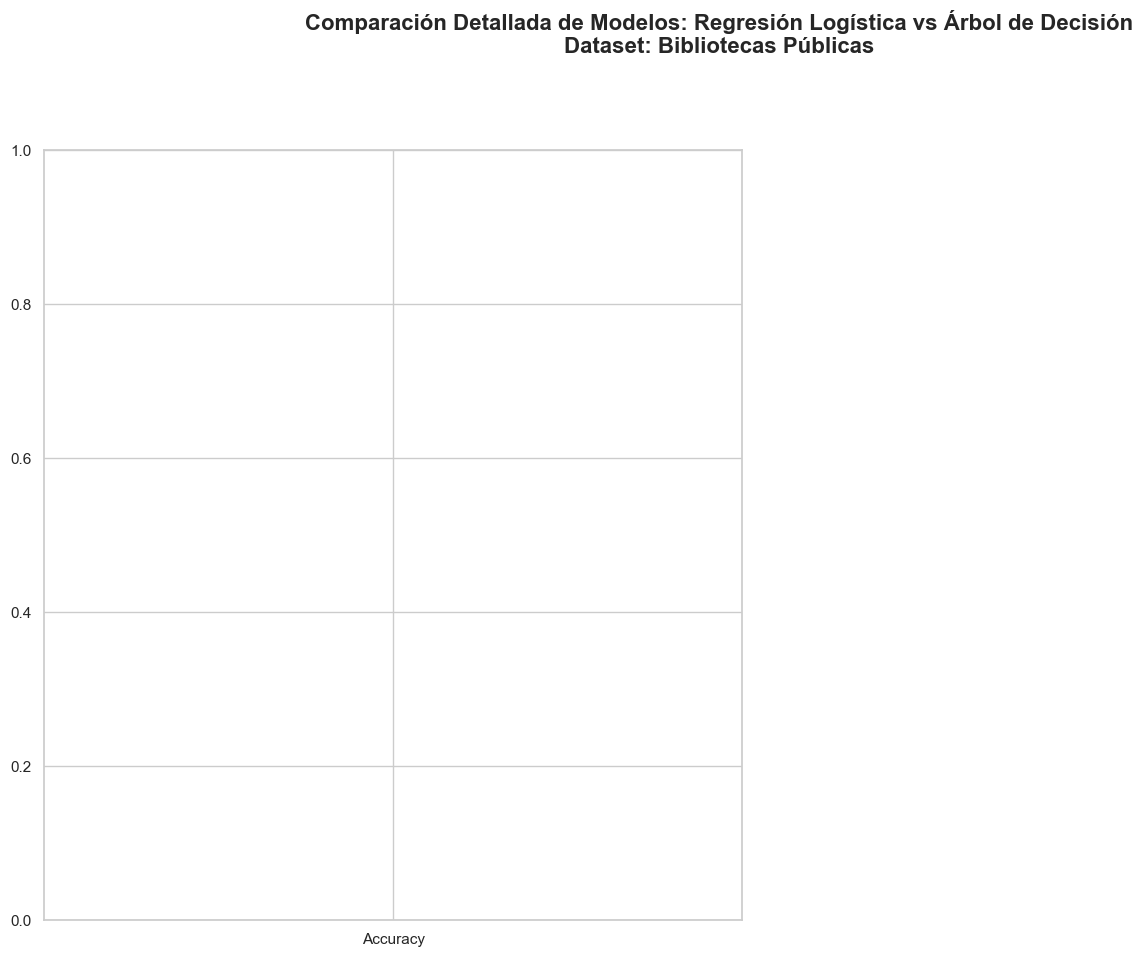

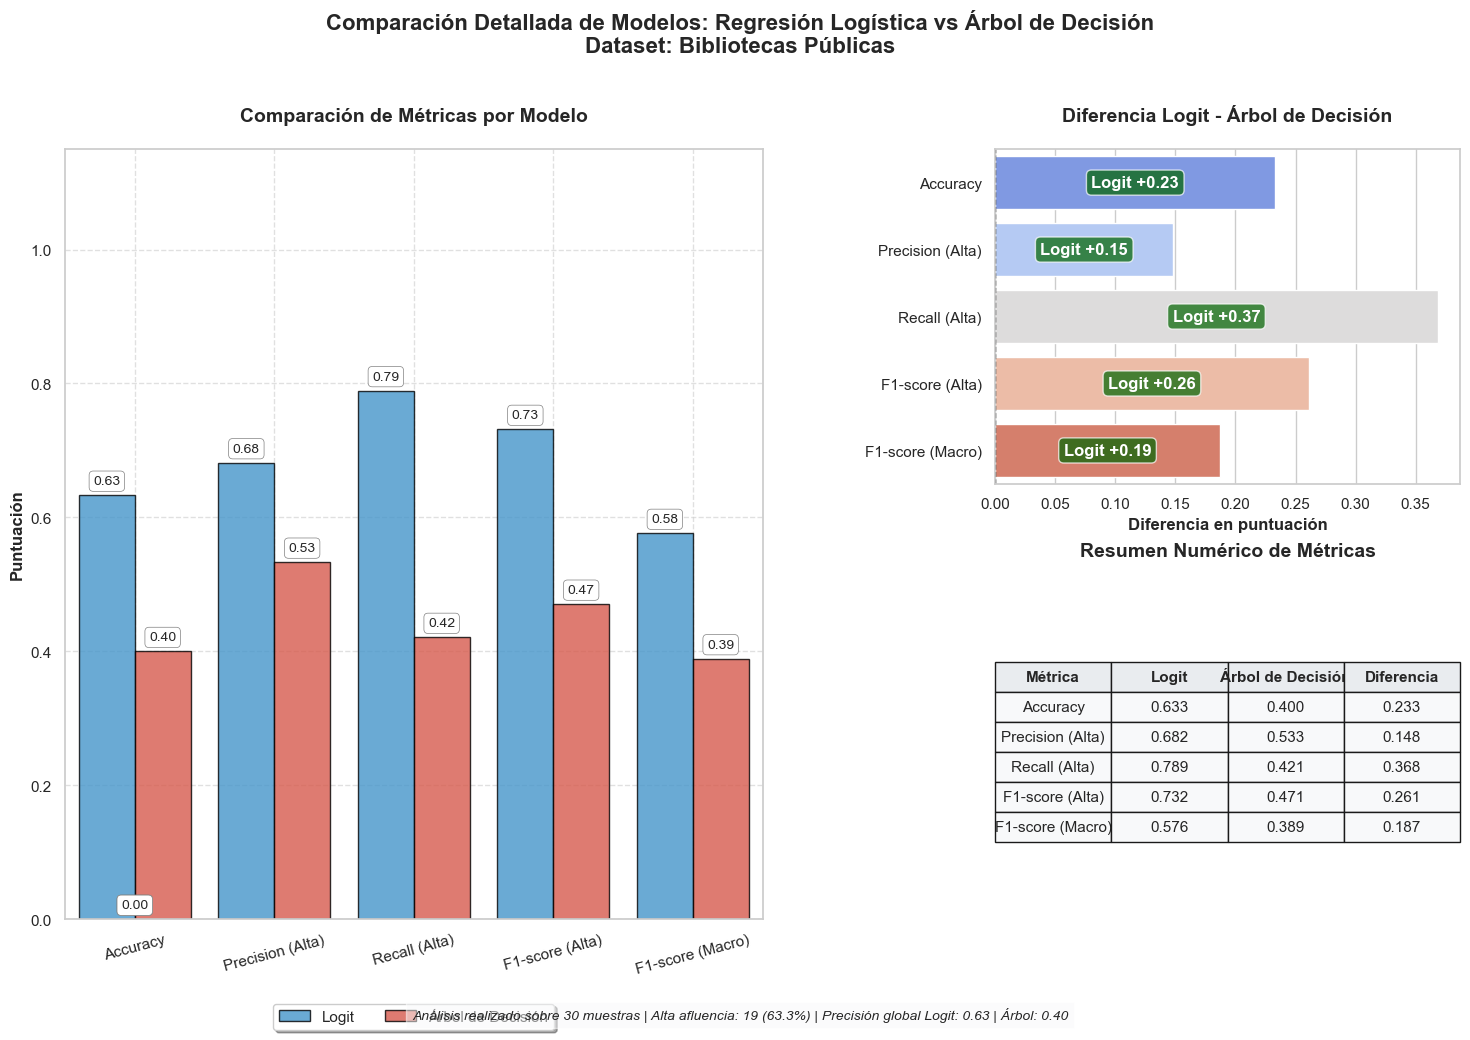

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Configuración de estilo mejorada
sns.set_theme(style="whitegrid")  # Configuración adicional con Seaborn
# CORRECCIÓN: Ajustamos las claves del palette para que coincidan con los nombres en el dataframe
palette = {"Logit": "#3498db", "Árbol de Decisión": "#e74c3c"}
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.size'] = 12

# Resto del código se mantiene igual...
df_comp = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision (Alta)", "Recall (Alta)", "F1-score (Alta)", "F1-score (Macro)"],
    "Logit": [
        report_log["accuracy"],
        report_log["1"]["precision"],
        report_log["1"]["recall"],
        report_log["1"]["f1-score"],
        report_log["macro avg"]["f1-score"]
    ],
    "Árbol de Decisión": [
        report_tree["accuracy"],
        report_tree["1"]["precision"],
        report_tree["1"]["recall"],
        report_tree["1"]["f1-score"],
        report_tree["macro avg"]["f1-score"]
    ]
})

# Crear figura completa
fig = plt.figure(figsize=(18, 10), facecolor='white')
fig.suptitle('Comparación Detallada de Modelos: Regresión Logística vs Árbol de Decisión\nDataset: Bibliotecas Públicas', 
             fontsize=16, y=1.02, weight='bold')

# Definir layout con GridSpec
gs = GridSpec(2, 2, figure=fig, width_ratios=[1.5, 1], height_ratios=[1, 1], hspace=0.3, wspace=0.4)

# Gráfico de barras comparativas (principal)
ax1 = fig.add_subplot(gs[:, 0])
df_melt = df_comp.melt(id_vars="Métrica", var_name="Modelo", value_name="Valor")
barplot = sns.barplot(data=df_melt, x="Métrica", y="Valor", hue="Modelo", palette=palette, ax=ax1, 
                     edgecolor='black', linewidth=1, alpha=0.8, saturation=0.8)

# Añadir valores en las barras
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.5))

ax1.set_title('Comparación de Métricas por Modelo', pad=20, fontsize=14)
ax1.set_ylim(0, 1.15)
ax1.set_ylabel('Puntuación', fontsize=12)
ax1.set_xlabel('')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=True, shadow=True)
ax1.tick_params(axis='x', rotation=15)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de diferencias (derecha superior)
ax2 = fig.add_subplot(gs[0, 1])
df_comp['Diferencia'] = df_comp['Logit'] - df_comp['Árbol de Decisión']
sns.barplot(data=df_comp, x='Diferencia', y='Métrica', palette='coolwarm', ax=ax2)

ax2.axvline(0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Diferencia Logit - Árbol de Decisión', pad=20, fontsize=14)
ax2.set_xlabel('Diferencia en puntuación', fontsize=12)
ax2.set_ylabel('')

# Añadir anotaciones mejoradas
for i, (_, row) in enumerate(df_comp.iterrows()):
    diff = row['Diferencia']
    color = 'darkgreen' if diff > 0 else 'darkred'
    ax2.text(diff/2 if diff > 0 else diff, i, 
             f"{'Logit +' if diff > 0 else 'Árbol +'}{abs(diff):.2f}", 
             ha='center' if diff > 0 else 'right', 
             va='center', color='white', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor=color, alpha=0.7))

# Tabla de métricas (derecha inferior)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

# Crear tabla con mejor formato
cell_text = []
for row in df_comp.values:
    cell_text.append([f"{x:.3f}" if isinstance(x, float) else x for x in row])

table = ax3.table(cellText=cell_text,
                 colLabels=df_comp.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f8f9fa']*4,
                 cellColours=[['#f8f9fa']*4]*len(df_comp))

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.8)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#e9ecef')

ax3.set_title('Resumen Numérico de Métricas', pad=20, fontsize=14)

# Añadir información contextual mejorada
plt.figtext(0.5, 0.01, 
            f"Análisis realizado sobre {len(y_test)} muestras | Alta afluencia: {sum(y_test)} ({sum(y_test)/len(y_test):.1%}) | " 
            f"Precisión global Logit: {report_log['accuracy']:.2f} | Árbol: {report_tree['accuracy']:.2f}",
            ha="center", fontsize=10, style='italic', bbox=dict(facecolor='#f8f9fa', alpha=0.5))

plt.tight_layout()
plt.show()